# TASK #1: UNDESTAND THE PROBLEM STATEMENT AND BUSINESS CASE

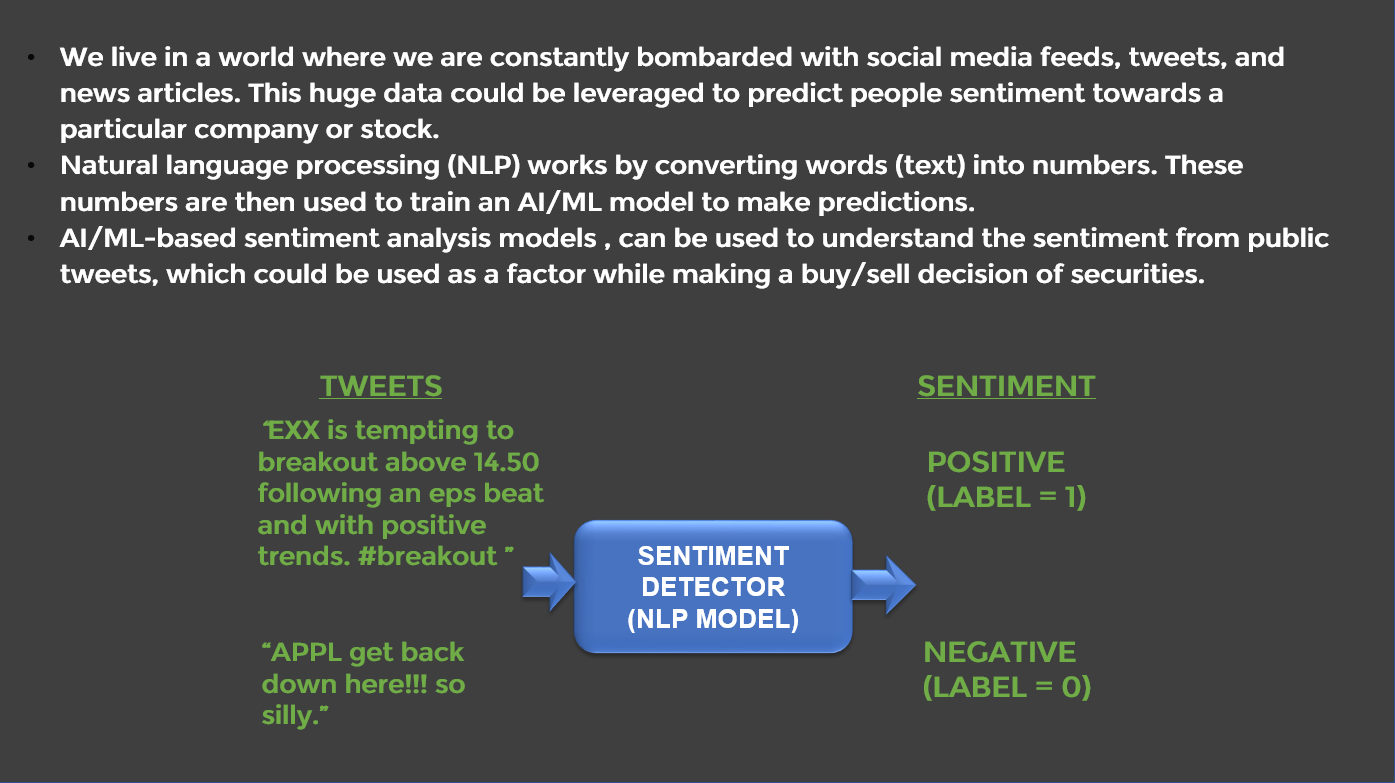

# TASK #2: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [1]:
!pip install wordcloud

# install gensim
# Gensim is an open-source library for unsupervised topic modeling and natural language processing
# Gensim is implemented in Python and Cython.
!pip install gensim

# install nltk
# NLTK: Natural Language tool kit
!pip install nltk


In [2]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [4]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [11]:
# load the stock news data
stock_df = pd.read_csv('./stock_sentiment.csv')

In [12]:
# Let's view the dataset 
stock_df.head() # Sentiment: 0 mean negative sentiment, 1 is positive sentiment

Text  Sentiment
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1
1  user: AAP MOVIE. 55% return for the FEA/GEED i...          1
2  user I'd be afraid to short AMZN - they are lo...          1
3                                  MNTA Over 12.00            1
4                                   OI  Over 21.37            1

In [13]:
# dataframe information
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [14]:
# check for null values
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

**MINI CHALLENGE #1:**

- **How many unique elements are present in the 'sentiment' column? Try to find out with two different methods**

/opt/homebrew/Caskroom/miniforge/base/envs/m1_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

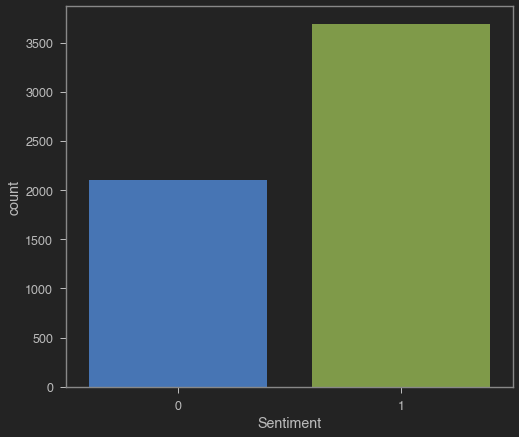

In [15]:
sns.countplot(stock_df['Sentiment'])

# TASK #3: PERFORM DATA CLEANING (REMOVE PUNCTUATIONS FROM TEXT)


In [16]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
Test = 'Good morning beautiful people :)... #I am having fun learning Finance with Python!!'

In [20]:
Test_punc_removed = [char for char in Test if char not in string.punctuation ]
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'F',
 'i',
 'n',
 'a',
 'n',
 'c',
 'e',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 'P',
 'y',
 't',
 'h',
 'o',
 'n']

In [22]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Finance with Python'

In [23]:
# Let's define a function to remove punctuations
def remove_punc(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    return Test_punc_removed_join

In [24]:
# Let's remove punctuations from our dataset 
stock_df['Text Wihout Punctuation'] = stock_df['Text'].apply(remove_punc)

In [25]:
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                                Text Wihout Punctuation  
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...  
1     user AAP MOVIE 55 return for the FEAGEED indic...  
2     user Id be afraid to short AMZN  they are look...  
3                                      MNTA Over 1200    
4                                       OI  Over 2137    
...                                                 ...  
5786  Industry body CII said discoms are likely to s...  
5787  Gold prices slip below Rs 46000 as investors b...  
5788  Workers at Bajaj Auto have agreed to a 10 wage...  
5789  Sharemarket LIVE Sensex off day’s high up 600 ...  
5790  Sensex Nifty climb off days highs still up 2 K...  

[5791 rows x 3 columns]

In [28]:
stock_df['Text'][2]

"user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service"

In [30]:
stock_df['Text Wihout Punctuation'][2]

'user Id be afraid to short AMZN  they are looking like a nearmonopoly in eBooks and infrastructureasaservice'

**MINI CHALLENGE #2:** 
- **Remove punctuations using a different method**

In [31]:
Test_punc_removed = []
for char in Test:
    if char not in string.punctuation:
        Test_punc_removed.append(char)
Test_punc_removed_join =''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Finance with Python'

# TASK #4: PERFORM DATA CLEANING (REMOVE STOPWORDS)

In [32]:
# download stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/calvinnguyen/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year','https'])


In [41]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
            
    return result

In [42]:
# apply pre-processing to the text column
stock_df['Text Without Punc & Stopwords']  = stock_df['Text Wihout Punctuation'].apply(preprocess)

In [43]:
stock_df['Text'][0]

'Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts'

In [44]:
stock_df['Text Without Punc & Stopwords'][0]

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [24]:
# join the words into a string
# stock_df['Processed Text 2'] = stock_df['Processed Text 2'].apply(lambda x: " ".join(x))

In [39]:
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                                Text Wihout Punctuation  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...   
1     user AAP MOVIE 55 return for the FEAGEED indic...   
2     user Id be afraid to short AMZN  they are look...   
3                                      MNTA Over 1200     
4                                       OI  Over 2137     
...                                                 ...   
5786  Industry body CII said discoms are likely to s...   
5787  Gold prices slip below Rs 46000 as investors b...   
5788  Workers at Bajaj Auto have agreed to a 10 wage...   
5789  Sharemarket LIVE Sensex off day’s high up 600 ...   
5790  Sensex Nifty climb off days highs still up 2 K...   

                          Text Without Punc & Stopwords  
0     [kickers, watchlist, xide, tit, soq, pnk, cpw,...  
1     [movie, return, feageed, indicator, trades, aw...  
2     [afraid, short, amzn, looking, like, nearmonop...  
3                                                [mnta]  
4                                                    []  
...                                                 ...  
5786  [industry, body, cii, said, discoms, likely, s...  
5787  [gold, prices, slip, investors, book, profits,...  
5788  [workers, bajaj, auto, agreed, wage, cut, peri...  
5789  [sharemarket, live, sensex, high, points, nift...  
5790  [sensex, nifty, climb, days, highs, still, key...  

[5791 rows x 4 columns]

**MINI CHALLENGE #3:**
- **Add 'https' to the list of stopwords and rerun the code**

# TASK #5: PLOT WORDCLOUD

In [45]:
# join the words into a string
stock_df['Text Without Punc & Stopwords Joined'] = stock_df['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))

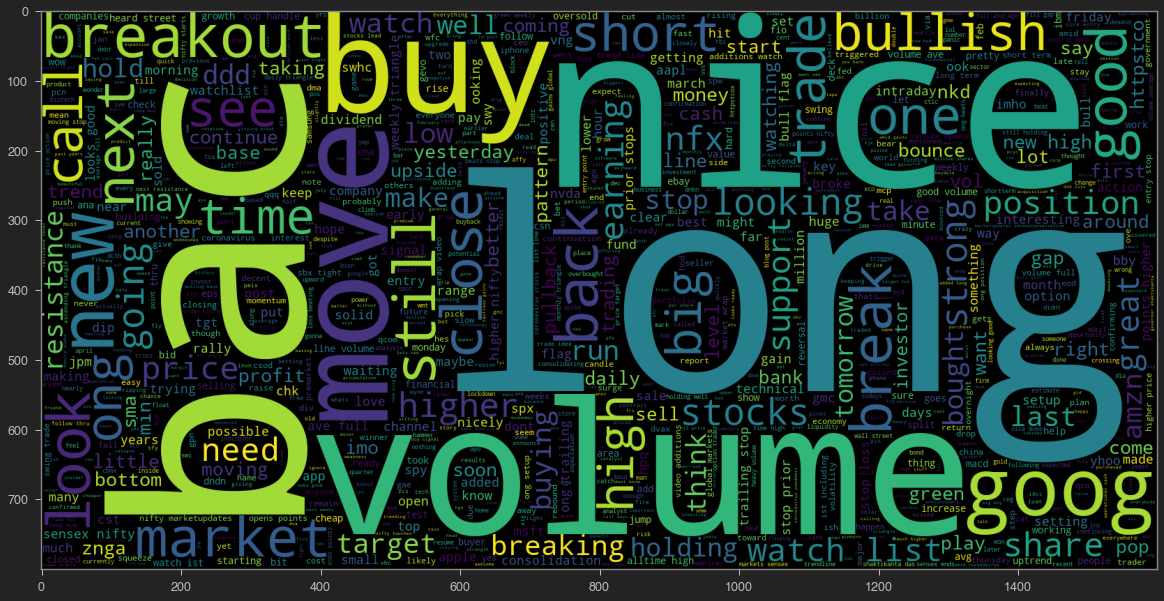

In [48]:
# plot the word cloud for text with positive sentiment
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000, width = 1600, height=800).generate(" ".join(stock_df['Text Without Punc & Stopwords Joined'][(stock_df['Sentiment']==1)]))
plt.imshow(wc)

**MINI CHALLENGE #4:**
- **Visualize the wordcloud for tweets that have negative sentiment**

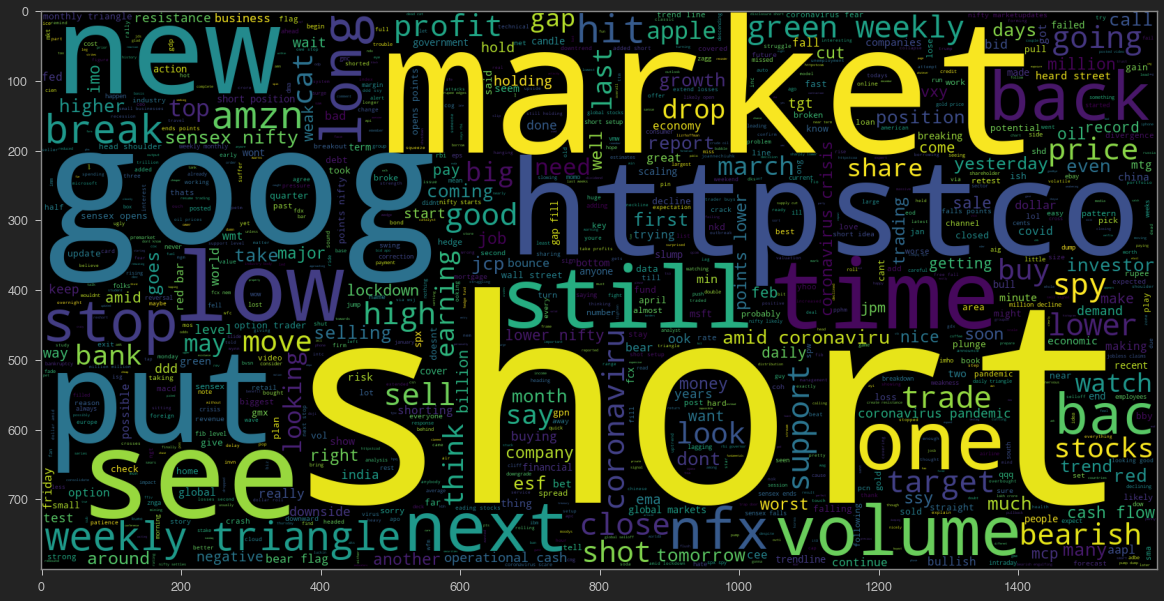

In [49]:
# plot the word cloud for text with positive sentiment
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000, width = 1600, height=800).generate(" ".join(stock_df['Text Without Punc & Stopwords Joined'][(stock_df['Sentiment']==0)]))
plt.imshow(wc)

# TASK #6: VISUALIZE CLEANED DATASETS

In [50]:
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                                Text Wihout Punctuation  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...   
1     user AAP MOVIE 55 return for the FEAGEED indic...   
2     user Id be afraid to short AMZN  they are look...   
3                                      MNTA Over 1200     
4                                       OI  Over 2137     
...                                                 ...   
5786  Industry body CII said discoms are likely to s...   
5787  Gold prices slip below Rs 46000 as investors b...   
5788  Workers at Bajaj Auto have agreed to a 10 wage...   
5789  Sharemarket LIVE Sensex off day’s high up 600 ...   
5790  Sensex Nifty climb off days highs still up 2 K...   

                          Text Without Punc & Stopwords  \
0     [kickers, watchlist, xide, tit, soq, pnk, cpw,...   
1     [movie, return, feageed, indicator, trades, aw...   
2     [afraid, short, amzn, looking, like, nearmonop...   
3                                                [mnta]   
4                                                    []   
...                                                 ...   
5786  [industry, body, cii, said, discoms, likely, s...   
5787  [gold, prices, slip, investors, book, profits,...   
5788  [workers, bajaj, auto, agreed, wage, cut, peri...   
5789  [sharemarket, live, sensex, high, points, nift...   
5790  [sensex, nifty, climb, days, highs, still, key...   

                   Text Without Punc & Stopwords Joined  
0     kickers watchlist xide tit soq pnk cpw bpz tra...  
1         movie return feageed indicator trades awesome  
2     afraid short amzn looking like nearmonopoly eb...  
3                                                  mnta  
4                                                        
...                                                 ...  
5786  industry body cii said discoms likely suffer n...  
5787  gold prices slip investors book profits amid c...  
5788  workers bajaj auto agreed wage cut period apri...  
5789  sharemarket live sensex high points nifty test...  
5790  sensex nifty climb days highs still key factor...  

[5791 rows x 5 columns]

In [51]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/calvinnguyen/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [52]:
# word_tokenize is used to break up a string into words
print(stock_df['Text Without Punc & Stopwords Joined'][0])
print(nltk.word_tokenize(stock_df['Text Without Punc & Stopwords Joined'][0]))

kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts
['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts']


In [53]:
tweets_length = [ len(nltk.word_tokenize(x)) for x in stock_df['Text Without Punc & Stopwords Joined'] ]
tweets_length

[14,
 6,
 7,
 1,
 0,
 1,
 8,
 13,
 8,
 4,
 10,
 18,
 8,
 8,
 11,
 5,
 12,
 10,
 12,
 4,
 6,
 5,
 2,
 5,
 3,
 10,
 3,
 3,
 9,
 6,
 8,
 10,
 8,
 3,
 10,
 11,
 4,
 8,
 11,
 10,
 10,
 7,
 9,
 8,
 4,
 10,
 8,
 7,
 7,
 9,
 10,
 10,
 8,
 2,
 14,
 12,
 9,
 8,
 1,
 14,
 7,
 11,
 5,
 13,
 6,
 6,
 7,
 6,
 6,
 10,
 9,
 4,
 10,
 13,
 16,
 6,
 9,
 6,
 2,
 11,
 5,
 4,
 9,
 11,
 16,
 4,
 9,
 5,
 6,
 2,
 1,
 5,
 9,
 4,
 7,
 6,
 7,
 10,
 1,
 3,
 9,
 4,
 16,
 8,
 10,
 11,
 18,
 6,
 7,
 13,
 12,
 9,
 3,
 3,
 10,
 10,
 8,
 6,
 8,
 5,
 5,
 8,
 9,
 15,
 3,
 5,
 9,
 18,
 13,
 11,
 3,
 1,
 1,
 2,
 7,
 12,
 12,
 8,
 8,
 10,
 9,
 10,
 15,
 8,
 9,
 9,
 12,
 10,
 6,
 10,
 13,
 4,
 11,
 8,
 15,
 13,
 8,
 12,
 5,
 5,
 3,
 7,
 2,
 4,
 10,
 5,
 6,
 10,
 6,
 16,
 9,
 6,
 5,
 10,
 9,
 10,
 8,
 2,
 10,
 9,
 10,
 12,
 7,
 10,
 7,
 3,
 6,
 5,
 9,
 9,
 4,
 6,
 5,
 4,
 4,
 8,
 10,
 8,
 8,
 13,
 9,
 7,
 10,
 12,
 8,
 6,
 5,
 3,
 10,
 11,
 6,
 9,
 10,
 13,
 10,
 7,
 12,
 7,
 11,
 10,
 4,
 4,
 3,
 10,
 2,
 9,
 10,
 15,
 12,
 10

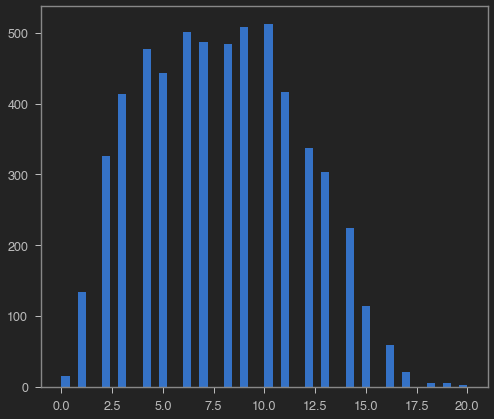

In [57]:
plt.hist(tweets_length, bins=50)
plt.show()

**MINI CHALLENGE #5:**
- **Use Seaborn Countplot to visually indicate how many samples belong to the positive and negative sentiments class**

/opt/homebrew/Caskroom/miniforge/base/envs/m1_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

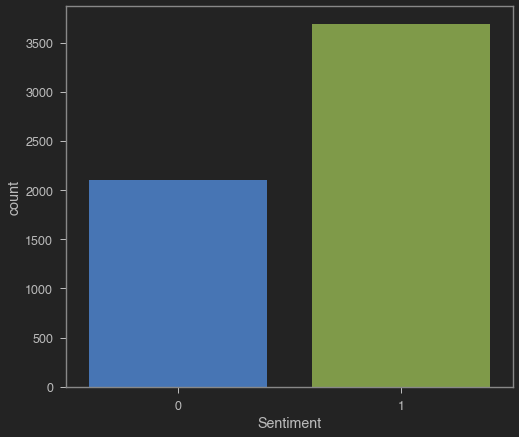

In [58]:
sns.countplot(stock_df['Sentiment'])

# TASK #7: PREPARE THE DATA BY TOKENIZING AND PADDING

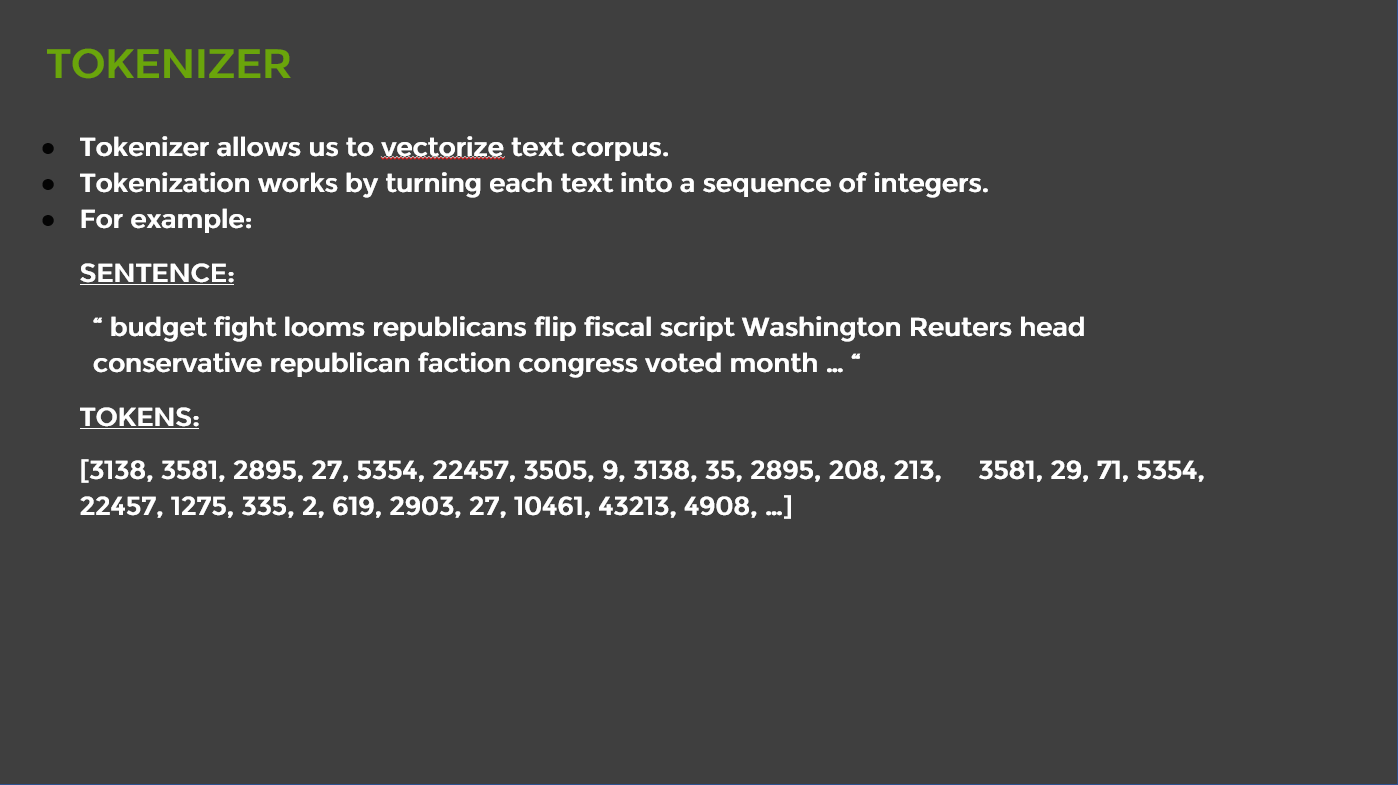

In [59]:
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                                Text Wihout Punctuation  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...   
1     user AAP MOVIE 55 return for the FEAGEED indic...   
2     user Id be afraid to short AMZN  they are look...   
3                                      MNTA Over 1200     
4                                       OI  Over 2137     
...                                                 ...   
5786  Industry body CII said discoms are likely to s...   
5787  Gold prices slip below Rs 46000 as investors b...   
5788  Workers at Bajaj Auto have agreed to a 10 wage...   
5789  Sharemarket LIVE Sensex off day’s high up 600 ...   
5790  Sensex Nifty climb off days highs still up 2 K...   

                          Text Without Punc & Stopwords  \
0     [kickers, watchlist, xide, tit, soq, pnk, cpw,...   
1     [movie, return, feageed, indicator, trades, aw...   
2     [afraid, short, amzn, looking, like, nearmonop...   
3                                                [mnta]   
4                                                    []   
...                                                 ...   
5786  [industry, body, cii, said, discoms, likely, s...   
5787  [gold, prices, slip, investors, book, profits,...   
5788  [workers, bajaj, auto, agreed, wage, cut, peri...   
5789  [sharemarket, live, sensex, high, points, nift...   
5790  [sensex, nifty, climb, days, highs, still, key...   

                   Text Without Punc & Stopwords Joined  
0     kickers watchlist xide tit soq pnk cpw bpz tra...  
1         movie return feageed indicator trades awesome  
2     afraid short amzn looking like nearmonopoly eb...  
3                                                  mnta  
4                                                        
...                                                 ...  
5786  industry body cii said discoms likely suffer n...  
5787  gold prices slip investors book profits amid c...  
5788  workers bajaj auto agreed wage cut period apri...  
5789  sharemarket live sensex high points nifty test...  
5790  sensex nifty climb days highs still key factor...  

[5791 rows x 5 columns]

In [62]:
# Obtain the total words present in the dataset
list_of_words =[]
for i in stock_df['Text Without Punc & Stopwords']:
    for j in i:
        list_of_words.append(j)

In [63]:
list_of_words

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts',
 'movie',
 'return',
 'feageed',
 'indicator',
 'trades',
 'awesome',
 'afraid',
 'short',
 'amzn',
 'looking',
 'like',
 'nearmonopoly',
 'ebooks',
 'mnta',
 'pgnx',
 'current',
 'downtrend',
 'break',
 'otherwise',
 'shortterm',
 'correction',
 'medterm',
 'downtrend',
 'mondays',
 'relative',
 'weakness',
 'nyx',
 'win',
 'tie',
 'tap',
 'ice',
 'int',
 'bmc',
 'aon',
 'chk',
 'biib',
 'goog',
 'ower',
 'trend',
 'line',
 'channel',
 'test',
 'volume',
 'support',
 'watch',
 'tomorrow',
 'ong',
 'entry',
 'assuming',
 'fcx',
 'opens',
 'tomorrow',
 'trigger',
 'buy',
 'still',
 'much',
 'like',
 'setup',
 'really',
 'worries',
 'everyone',
 'expects',
 'market',
 'rally',
 'nowusually',
 'exact',
 'opposite',
 'happens',
 'every',
 'time',
 'shall',
 'see',
 'soon',
 'bac',
 'spx',
 'jpm',
 'gamcos',
 'arry',
 'haverty',
 'apple',
 'extremely',
 'chea

In [64]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

9268

In [66]:
# split the data into test and train 
X = stock_df['Text Without Punc & Stopwords']
y = stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [67]:
X_train.shape

(4632,)

In [68]:
X_test.shape

(1159,)

In [69]:
X_train

1561       [continues, make, new, highs, since, breaking]
4284    [disney, cancels, clone, wars, plans, shows, e...
638     [demand, breast, implants, alltime, highs, goo...
3560    [equity, alpha, infa, fav, short, opp, growth,...
2979    [covered, short, nice, profit, careful, tomorr...
                              ...                        
998     [eversal, confirmed, closing, nicely, also, co...
1623    [story, different, dayeaders, lagging, aggards...
4250            [vhc, hour, ascending, triangle, evident]
3000    [market, wrap, video, additions, watch, ist, i...
3287            [swing, trade, quick, pick, vegas, sands]
Name: Text Without Punc & Stopwords, Length: 4632, dtype: object

In [70]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)


In [71]:
train_sequences

[[196, 99, 6, 38, 64, 72],
 [1746, 3388, 3389, 1747, 1176, 699, 3390, 1397, 1747, 3391, 3392, 877, 1398],
 [240, 3393, 3394, 338, 38, 7, 437, 271, 2277, 531, 3395],
 [623, 772, 3396, 1748, 1, 1399, 180, 51, 773, 1],
 [414, 1, 12, 123, 878, 79, 2278, 532, 3397, 1000, 3398, 312, 65],
 [7, 181, 2, 81, 313, 879],
 [117, 23, 1749, 104, 59, 3399, 1400, 210, 624, 774, 458, 775, 56, 3400],
 [1177,
  1178,
  2279,
  135,
  6,
  1401,
  81,
  1750,
  272,
  3401,
  135,
  6,
  1401,
  19,
  24,
  81],
 [493, 1, 363],
 [1179, 147, 1402, 118, 3402, 46, 2280, 1001],
 [880, 1180, 124, 161, 625, 100, 15, 1181],
 [281, 569, 438, 439, 339, 92, 626, 3403, 494],
 [128, 16, 199, 40, 205],
 [700, 12, 2281, 221, 241, 16, 125, 88, 2, 776, 1182],
 [261, 197, 17, 32, 1002, 124, 30, 1003, 33, 1183, 242],
 [2282, 1403, 33, 105, 533],
 [47, 3, 42],
 [2283, 117, 59, 3404, 2284, 1751],
 [1004, 3405, 119, 115, 1752, 1753, 3406, 7, 777, 4, 53],
 [1005, 53, 106, 222, 3, 30, 570, 82, 1754, 2, 440],
 [1755, 3407, 1403, 

In [72]:
test_sequences

[[84, 32, 29, 1, 669, 123],
 [54, 32, 29, 1],
 [77, 43, 593, 75, 40, 3927, 660, 206, 551, 336],
 [120, 54, 127, 98],
 [452, 417, 666, 127, 397, 633, 417, 2085, 178, 15, 389, 611],
 [364, 1340, 1920, 5493, 14, 6670, 46],
 [225, 28, 487, 455, 1443],
 [128, 6201, 583, 157, 486, 2],
 [606, 445, 544],
 [2496, 719, 128, 221, 304, 196],
 [134, 553],
 [233, 141, 387, 141, 174, 34, 3314, 630, 80, 429, 2474, 1350],
 [26, 463, 45, 44, 31, 1412, 59, 82, 133, 83, 1764, 70],
 [26, 31, 1390, 83, 1764, 70, 20, 687],
 [743],
 [2109, 357, 12, 925, 441],
 [1736, 431, 42],
 [134, 6311],
 [23, 738, 75, 694, 571, 566, 2789, 290, 18],
 [24, 1, 48, 305, 3755, 81, 3059, 3295, 1428, 398, 4957, 174],
 [],
 [26, 645, 45, 16, 31, 1089],
 [22, 1891, 7583, 2648, 1365, 1819],
 [5509, 100, 253, 541, 2347, 5280],
 [350, 74, 1000, 18, 384, 1533],
 [134, 36, 11],
 [2984, 2245, 184, 7749, 62, 1, 76, 123],
 [335, 1580, 3247, 153, 16, 548, 561],
 [356, 271, 3255, 6213, 488, 482, 2826, 80],
 [3136, 613, 420, 338, 60, 102, 15

In [73]:
print("The encoding for document\n", X_train[1:2],"\n is: ", train_sequences[1])

The encoding for document
 4284    [disney, cancels, clone, wars, plans, shows, e...
Name: Text Without Punc & Stopwords, dtype: object 
 is:  [1746, 3388, 3389, 1747, 1176, 699, 3390, 1397, 1747, 3391, 3392, 877, 1398]


In [94]:
# Add padding to training and testing to make all of them fit into same lenght
padded_train = pad_sequences(train_sequences, maxlen = 15, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 15, truncating = 'post')

In [95]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [196  99   6  38  64  72   0   0   0   0   0   0   0   0   0]
The padded encoding for document: 2  is: [1746 3388 3389 1747 1176  699 3390 1397 1747 3391 3392  877 1398    0
    0]
The padded encoding for document: 3  is: [ 240 3393 3394  338   38    7  437  271 2277  531 3395    0    0    0
    0]


In [96]:
# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [97]:
y_train_cat.shape

(4632, 2)

In [98]:
y_test_cat.shape

(1159, 2)

In [99]:
y_train_cat

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

**MINI CHALLENGE #6:**

- **Change the padding length to 20 and rerun the code. Verify that padding was successful**


In [80]:
# Add padding to training and testing to make all of them fit into same lenght
padded_train = pad_sequences(train_sequences, maxlen = 20, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 20, truncating = 'post')

for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [196  99   6  38  64  72   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
The padded encoding for document: 2  is: [1746 3388 3389 1747 1176  699 3390 1397 1747 3391 3392  877 1398    0
    0    0    0    0    0    0]
The padded encoding for document: 3  is: [ 240 3393 3394  338   38    7  437  271 2277  531 3395    0    0    0
    0    0    0    0    0    0]


# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND RECURRENT NEURAL NETWORKS AND LONG SHORT TERM MEMORY NETWORKS (LSTM)

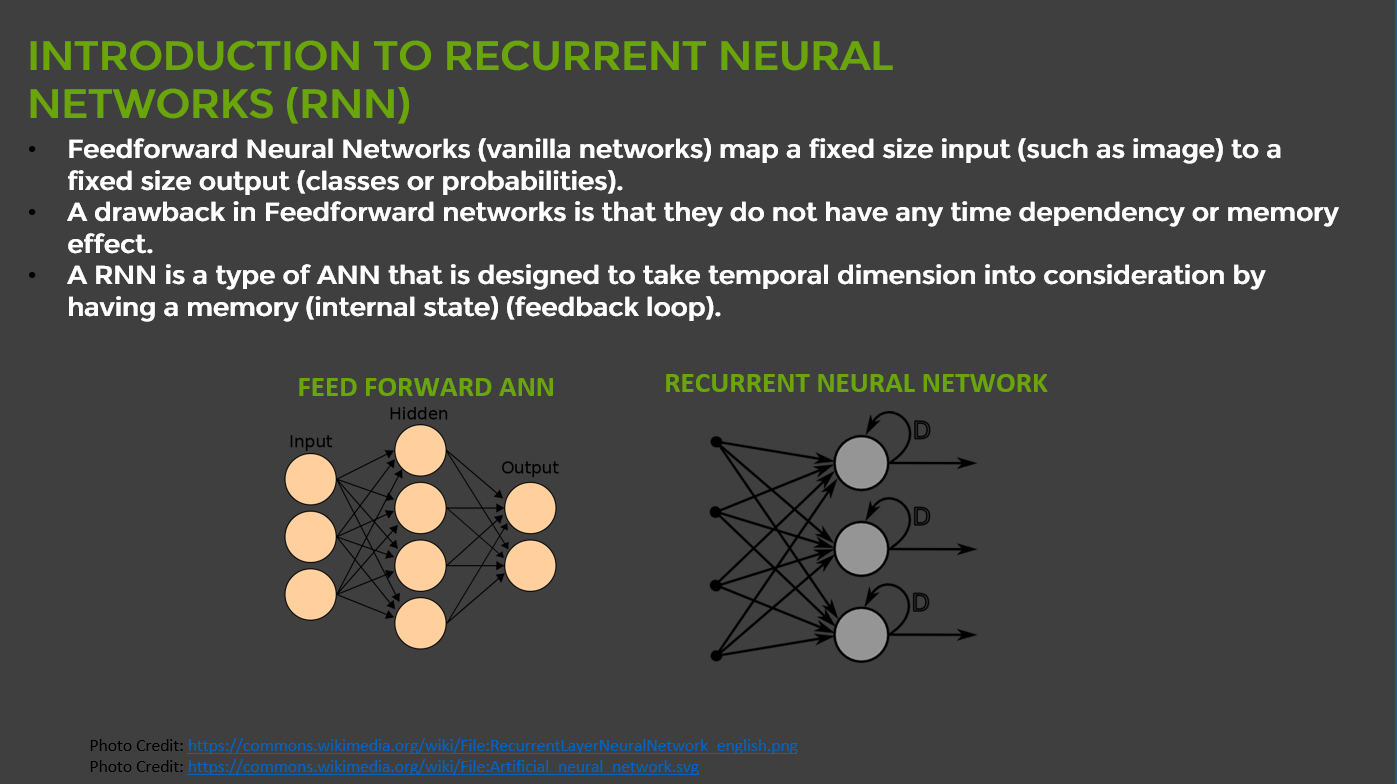

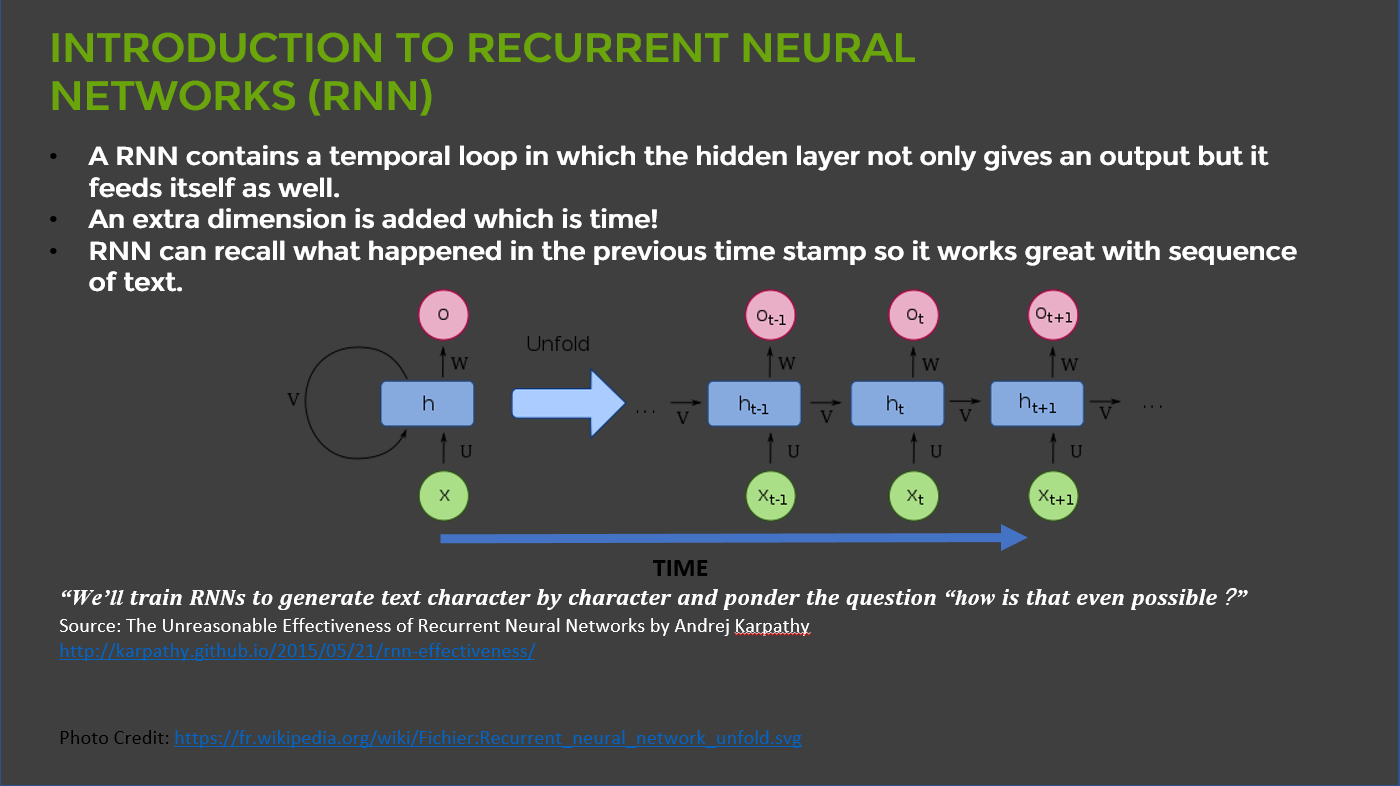

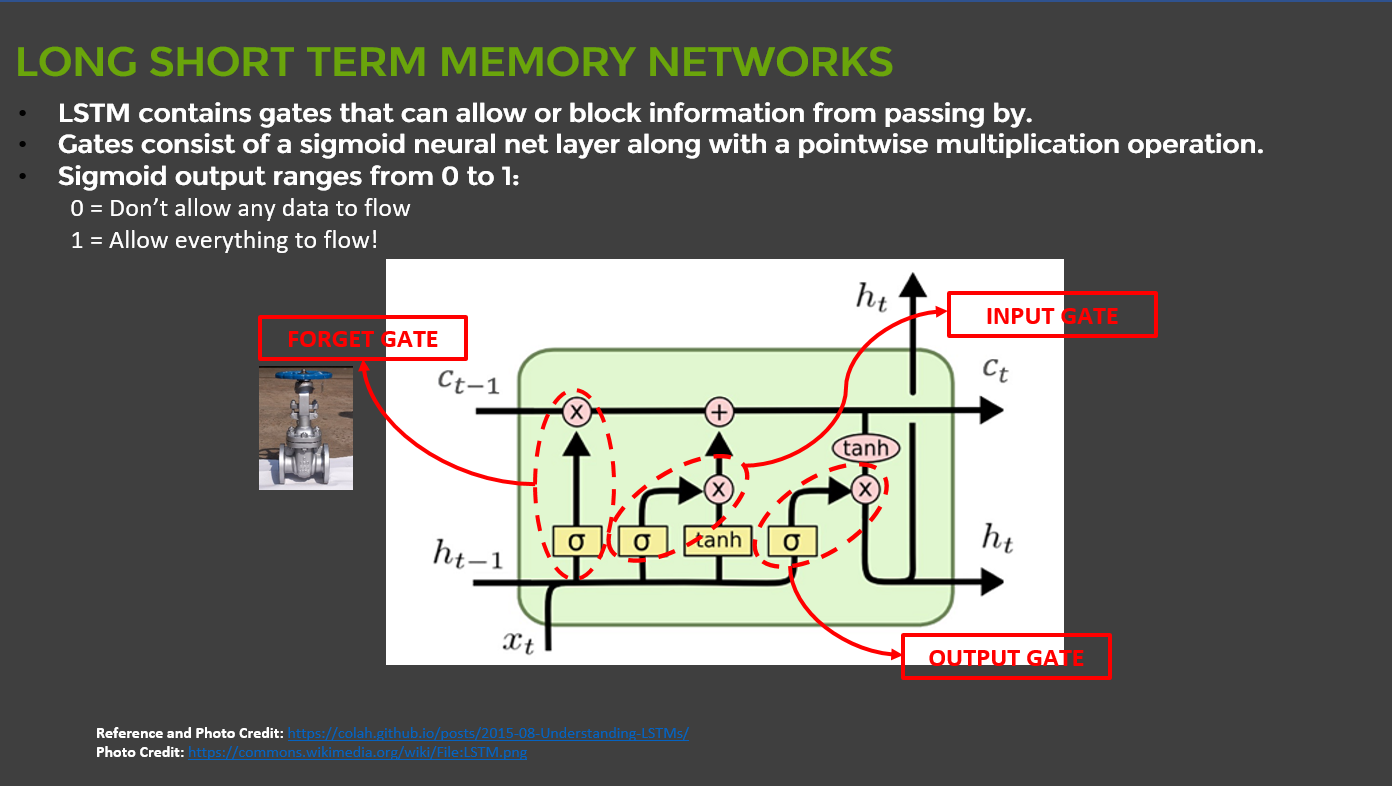

# TASK #9: BUILD A CUSTOM-BASED DEEP NEURAL NETWORK TO PERFORM SENTIMENT ANALYSIS

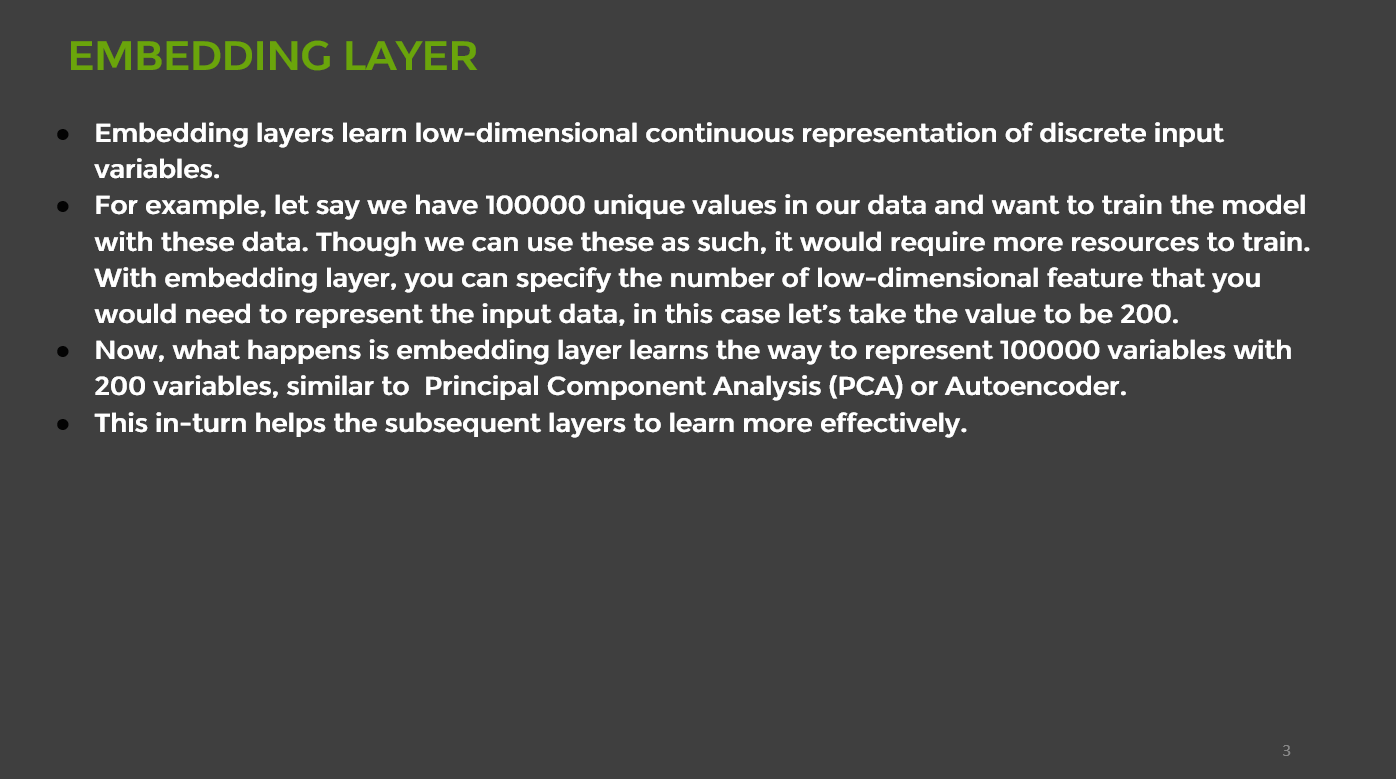

In [102]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 512))

# Bi-Directional RNN and LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 512)         4745216   
                                                                 
 lstm_2 (LSTM)               (None, 256)               787456    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 5,565,826
Trainable params: 5,565,826
Non-trainable params: 0
_________________________________________________________________


In [103]:
# train the model
model.fit(padded_train, y_train_cat, batch_size = 16, validation_split = 0.2, epochs = 5)

Epoch 1/5


2021-12-29 18:24:30.151712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-29 18:24:30.335363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  1/232 [..............................] - ETA: 3:45 - loss: 0.6880 - acc: 0.8750

2021-12-29 18:24:30.437520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


232/232 [==============================] - ETA: 0s - loss: 0.6579 - acc: 0.6418

2021-12-29 18:24:37.966441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-29 18:24:38.035220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


232/232 [==============================] - 9s 36ms/step - loss: 0.6579 - acc: 0.6418 - val_loss: 0.6576 - val_acc: 0.6311
Epoch 2/5
232/232 [==============================] - 8s 34ms/step - loss: 0.6568 - acc: 0.6418 - val_loss: 0.6560 - val_acc: 0.6300
Epoch 3/5
232/232 [==============================] - 8s 33ms/step - loss: 0.6538 - acc: 0.6432 - val_loss: 0.6600 - val_acc: 0.6300
Epoch 4/5
232/232 [==============================] - 8s 34ms/step - loss: 0.6538 - acc: 0.6526 - val_loss: 0.6559 - val_acc: 0.6321
Epoch 5/5
232/232 [==============================] - 8s 34ms/step - loss: 0.6016 - acc: 0.7042 - val_loss: 0.5940 - val_acc: 0.7109


# TASK #10: ASSESS TRAINED MODEL PERFORMANCE

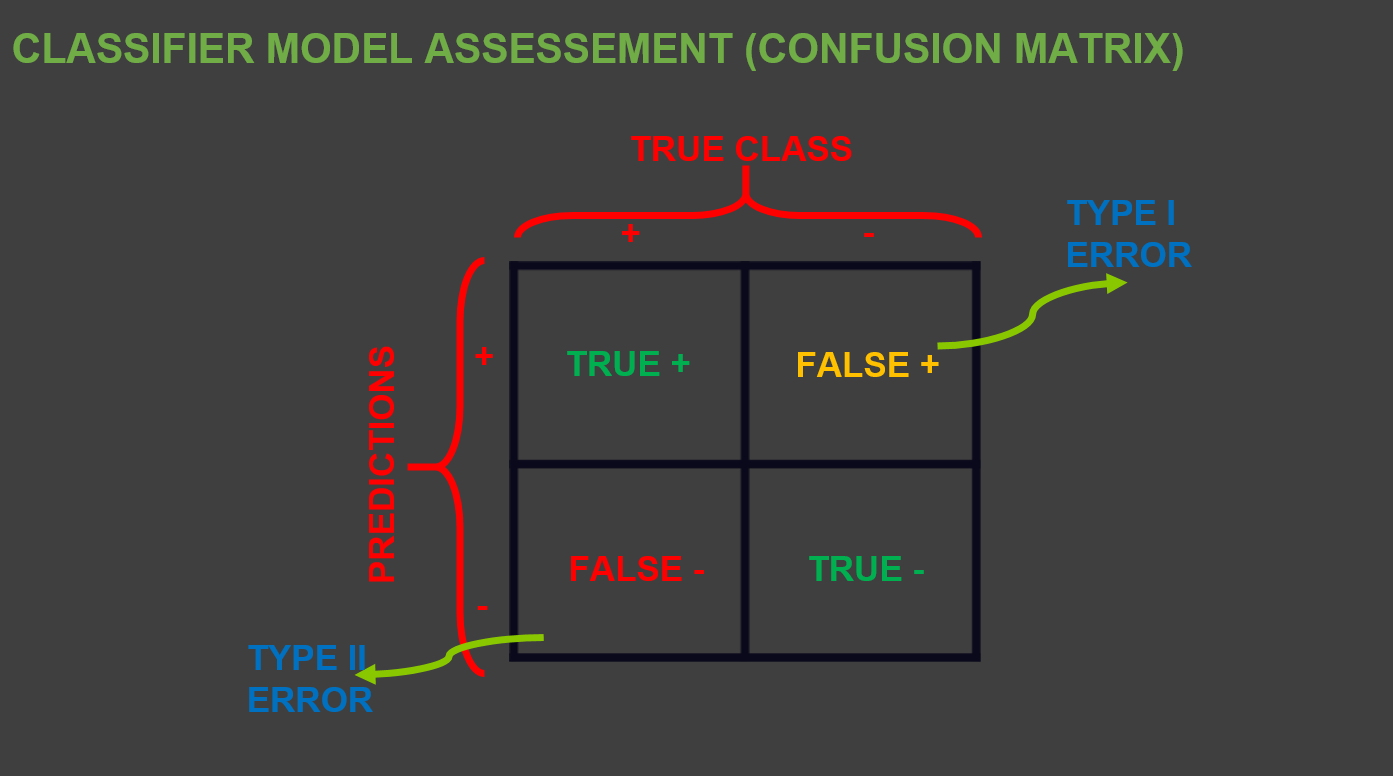

In [104]:
# make prediction
pred = model.predict(padded_test)

2021-12-29 18:25:32.562188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-29 18:25:32.618400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [105]:
# make prediction
prediction = []
for i in pred:
    prediction.append(np.argmax(i))

In [106]:
# list containing original values
original = []
for i in y_test_cat:
    original.append(np.argmax(i))

In [107]:
# acuracy score on text data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
accuracy

0.6635030198446937

<AxesSubplot:>

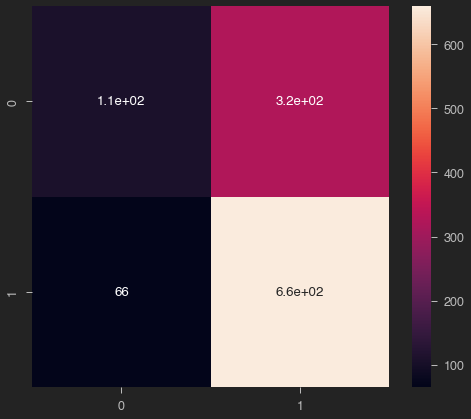

In [108]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True)

# **EXCELLENT JOB!**

# **MINI CHALLENGE SOLUTIONS**

**MINI CHALLENGE #1 SOLUTION:**

- **How many unique elements are present in the 'sentiment' column? Try to find out with two different methods**

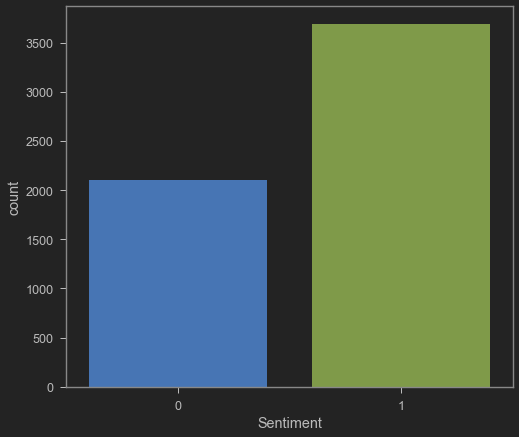

In [58]:
sns.countplot(stock_df['Sentiment'])

In [59]:
# Find the number of unique values in a particular column
stock_df['Sentiment'].nunique()

2

**MINI CHALLENGE #2 SOLUTION:** 
- **Remove punctuations using a different method**


In [60]:
Test_punc_removed = []
for char in Test: 
    if char not in string.punctuation:
        Test_punc_removed.append(char)

# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Finance with Python'

**MINI CHALLENGE #3 SOLUTION:**
- **Add 'https' to the list of stopwords and rerun the code**

In [61]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https'])

**MINI CHALLENGE #4 SOLUTION:**
- **Visualize the wordcloud for tweets that have negative sentiment**

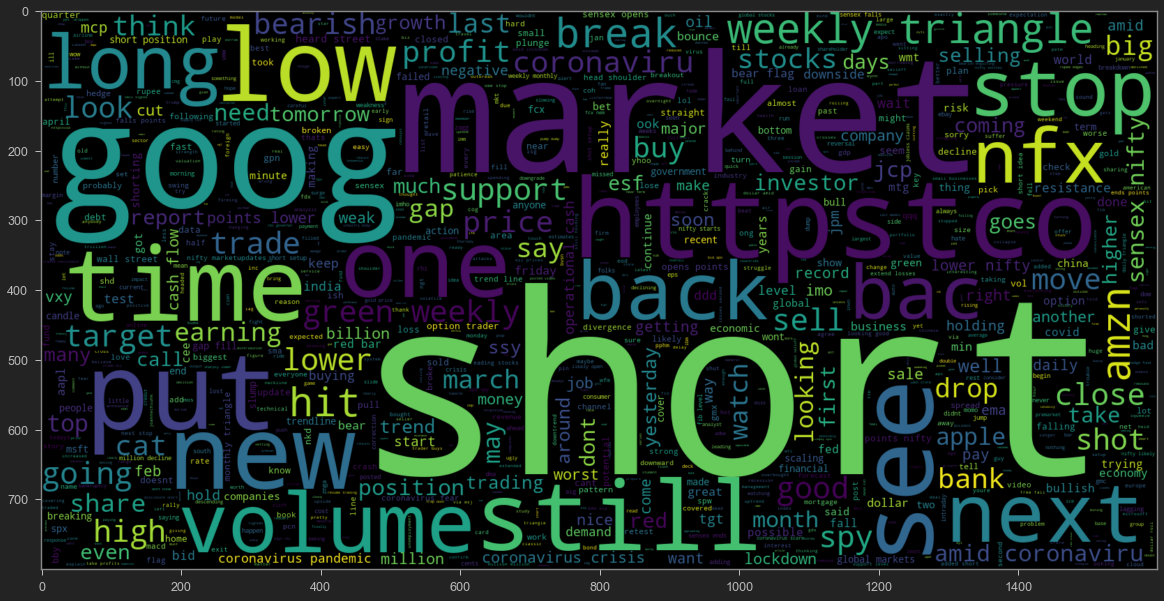

In [62]:
# plot the word cloud for text that is negative
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000, width = 1600, height = 800 ).generate(" ".join(stock_df[stock_df['Sentiment'] == 0]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

**MINI CHALLENGE #5 SOLUTION:**
- **Use Seaborn Countplot to visually indicate how many samples belong to the positive and negative sentiments**

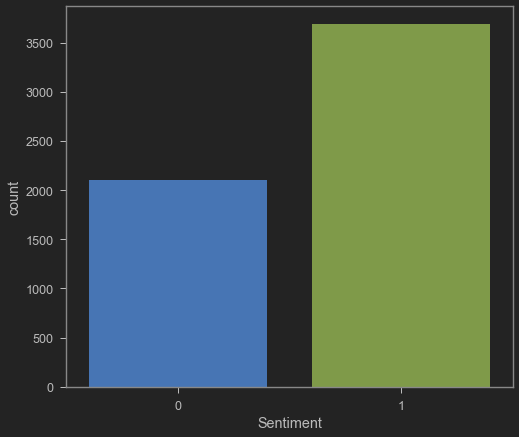

In [63]:
# plot the word count
sns.countplot(stock_df['Sentiment'])

**MINI CHALLENGE #6 SOLUTION:**

- **Change the padding length to 20 and rerun the code. Verify that padding was successful**


In [64]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 20, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 20, truncating = 'post')